In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [6]:

train = pd.read_csv('new_train.csv')
test = pd.read_csv('new_test.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Store                         844392 non-null  int64  
 1   Sales                         844392 non-null  int64  
 2   Customers                     844392 non-null  int64  
 3   Open                          844392 non-null  int64  
 4   Promo                         844392 non-null  int64  
 5   SchoolHoliday                 844392 non-null  int64  
 6   StateHoliday_0                844392 non-null  bool   
 7   StateHoliday_a                844392 non-null  bool   
 8   StateHoliday_b                844392 non-null  bool   
 9   StateHoliday_c                844392 non-null  bool   
 10  Month                         844392 non-null  int64  
 11  Year                          844392 non-null  int64  
 12  DayOfWeek_1                   844392 non-nul

In [11]:

from sklearn.model_selection import train_test_split


X = train.drop(columns=['Sales'])  
y = train['Sales']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# null value checks
train.isnull().sum()

Store                               0
Sales                           41088
Customers                       41088
Open                               11
Promo                               0
SchoolHoliday                       0
StateHoliday_0                      0
StateHoliday_a                      0
Month                               0
Year                                0
DayOfWeek_1                         0
DayOfWeek_2                         0
DayOfWeek_3                         0
DayOfWeek_4                         0
DayOfWeek_5                         0
DayOfWeek_6                         0
DayOfWeek_7                         0
CompetitionDistance                 0
Promo2                              0
StoreType_a                         0
StoreType_b                         0
StoreType_c                         0
StoreType_d                         0
Assortment_a                        0
Assortment_b                        0
Assortment_c                        0
CompetitionO

In [16]:
# Define RMSPE metric
def rmspe(y_true, y_pred):
    percentage_error = (y_true - y_pred) / y_true
    percentage_error[y_true == 0] = 0
    squared_percentage_error = percentage_error ** 2
    mean_squared_percentage_error = np.mean(squared_percentage_error)
    return np.sqrt(mean_squared_percentage_error)

In [19]:
# Helper function to fit and evaluate models
from sklearn.metrics import mean_squared_error, r2_score

# Helper function to fit and evaluate models
def try_model(model, model_name):
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    
    # Calculate metrics for training set
    train_mse = np.round(mean_squared_error(y_train, train_preds), 5)
    train_rmse = np.round(mean_squared_error(y_train, train_preds, squared=False), 5)
    train_r2 = np.round(r2_score(y_train, train_preds), 5)
    train_rmspe = np.round(rmspe(y_train, train_preds), 5)  # Ensure rmspe function is defined
    
    # Calculate metrics for test set
    test_mse = np.round(mean_squared_error(y_test, test_preds), 5)
    test_rmse = np.round(mean_squared_error(y_test, test_preds, squared=False), 5)
    test_r2 = np.round(r2_score(y_test, test_preds), 5)
    test_rmspe = np.round(rmspe(y_test, test_preds), 5)  # Ensure rmspe function is defined
    
    # Print metrics
    print(f"{model_name} Train MSE: {train_mse}")
    print(f"{model_name} Test MSE: {test_mse}")
    print(f"{model_name} Train RMSE: {train_rmse}")
    print(f"{model_name} Test RMSE: {test_rmse}")
    print(f"{model_name} Train R²: {train_r2}")
    print(f"{model_name} Test R²: {test_r2}")
    print(f"{model_name} Train RMSPE: {train_rmspe}")
    print(f"{model_name} Test RMSPE: {test_rmspe}")
    
    # Store metrics
    metrics = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Train RMSPE': train_rmspe,
        'Test RMSPE': test_rmspe
    }    

    return model, train_preds, test_preds, metrics



In [20]:
# Linear Regression
logit_model = LinearRegression()
logit_model, logit_train_preds, logit_val_preds, logit_metrics = try_model(logit_model, "Linear Regression")

Linear Regression Train MSE: 1534748.81935
Linear Regression Test MSE: 1516772.70393
Linear Regression Train RMSE: 1238.8498
Linear Regression Test RMSE: 1231.57326
Linear Regression Train R²: 0.84094
Linear Regression Test R²: 0.84176
Linear Regression Train RMSPE: 0.19152
Linear Regression Test RMSPE: 0.18643


In [21]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model, lasso_train_preds, lasso_val_preds, lasso_metrics = try_model(lasso_model, "Lasso Regression")

Lasso Regression Train MSE: 1534728.23335
Lasso Regression Test MSE: 1516703.54338
Lasso Regression Train RMSE: 1238.84149
Lasso Regression Test RMSE: 1231.54519
Lasso Regression Train R²: 0.84094
Lasso Regression Test R²: 0.84177
Lasso Regression Train RMSPE: 0.1916
Lasso Regression Test RMSPE: 0.18651


In [22]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model, ridge_train_preds, ridge_val_preds, ridge_metrics = try_model(ridge_model, "Ridge Regression")

Ridge Regression Train MSE: 1534727.9665
Ridge Regression Test MSE: 1516705.83691
Ridge Regression Train RMSE: 1238.84138
Ridge Regression Test RMSE: 1231.54612
Ridge Regression Train R²: 0.84094
Ridge Regression Test R²: 0.84177
Ridge Regression Train RMSPE: 0.19161
Ridge Regression Test RMSPE: 0.18652


In [23]:
# Visualizing Regression Results
def plot_results(true_values, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(true_values, predictions, alpha=0.3)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'k--', lw=2, color='red')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(title)
    plt.show()

/var/folders/yg/xmn_7fzd29x_t6vxtfn8_gsw0000gn/T/ipykernel_56475/2182712781.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'k--', lw=2, color='red')


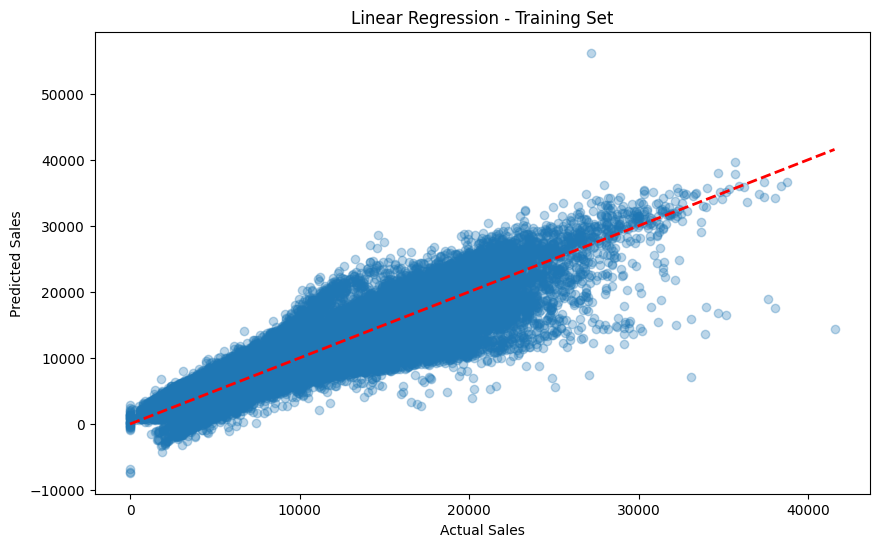

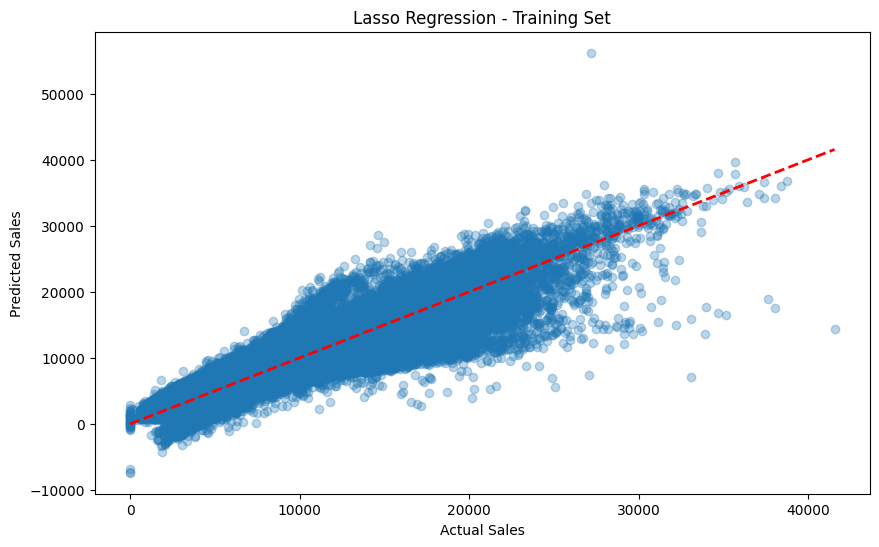

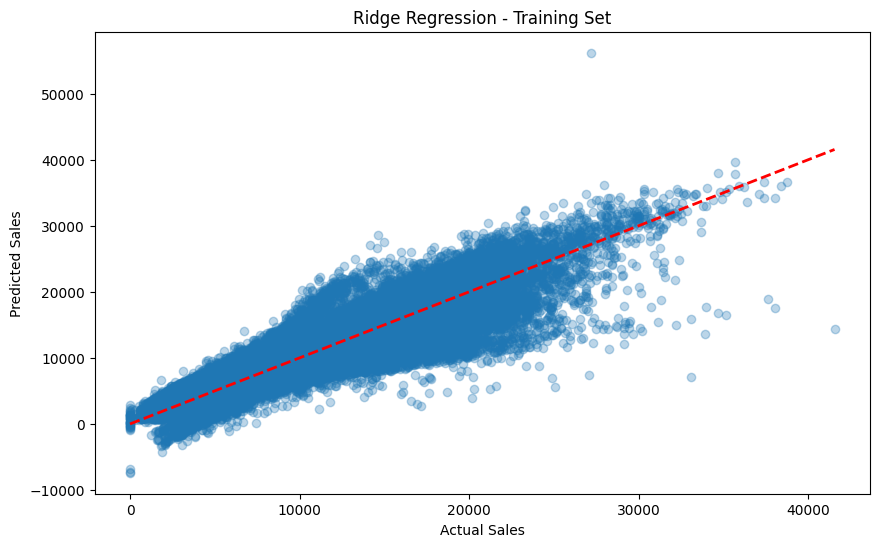

In [25]:
# Plot results for training set
plot_results(y_train, logit_train_preds, 'Linear Regression - Training Set')
plot_results(y_train, lasso_train_preds, 'Lasso Regression - Training Set')
plot_results(y_train, ridge_train_preds, 'Ridge Regression - Training Set')

Linear Regression Train MSE: 1534748.81935
Linear Regression Test MSE: 1516772.70393
Linear Regression Train RMSE: 1238.8498
Linear Regression Test RMSE: 1231.57326
Linear Regression Train R²: 0.84094
Linear Regression Test R²: 0.84176
Linear Regression Train RMSPE: 0.19152
Linear Regression Test RMSPE: 0.18643
Lasso Regression Train MSE: 1534754.31733
Lasso Regression Test MSE: 1516701.52866
Lasso Regression Train RMSE: 1238.85202
Lasso Regression Test RMSE: 1231.54437
Lasso Regression Train R²: 0.84094
Lasso Regression Test R²: 0.84177
Lasso Regression Train RMSPE: 0.19147
Lasso Regression Test RMSPE: 0.18638
Ridge Regression Train MSE: 1534727.9665
Ridge Regression Test MSE: 1516705.83691
Ridge Regression Train RMSE: 1238.84138
Ridge Regression Test RMSE: 1231.54612
Ridge Regression Train R²: 0.84094
Ridge Regression Test R²: 0.84177
Ridge Regression Train RMSPE: 0.19161
Ridge Regression Test RMSPE: 0.18652


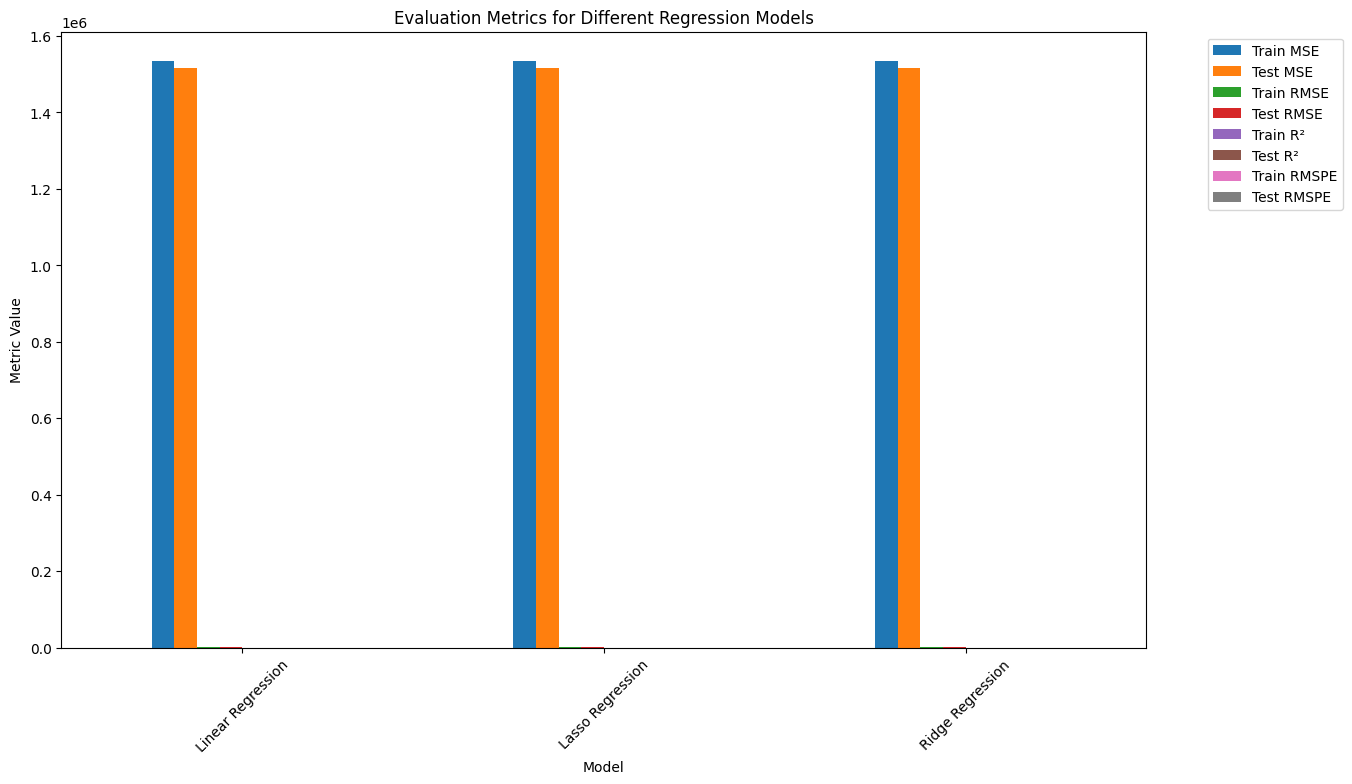

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Initialize models
logit_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

# Fit and evaluate models
logit_model, logit_train_preds, logit_test_preds, logit_metrics = try_model(logit_model, 'Linear Regression')
lasso_model, lasso_train_preds, lasso_test_preds, lasso_metrics = try_model(lasso_model, 'Lasso Regression')
ridge_model, ridge_train_preds, ridge_test_preds, ridge_metrics = try_model(ridge_model, 'Ridge Regression')



metrics_df = pd.DataFrame([
    {'Model': 'Linear Regression', 'Train MSE': logit_metrics['Train MSE'], 'Test MSE': logit_metrics['Test MSE'],
     'Train RMSE': logit_metrics['Train RMSE'], 'Test RMSE': logit_metrics['Test RMSE'],
     'Train R²': logit_metrics['Train R²'], 'Test R²': logit_metrics['Test R²'],
     'Train RMSPE': logit_metrics['Train RMSPE'], 'Test RMSPE': logit_metrics['Test RMSPE']},
    {'Model': 'Lasso Regression', 'Train MSE': lasso_metrics['Train MSE'], 'Test MSE': lasso_metrics['Test MSE'],
     'Train RMSE': lasso_metrics['Train RMSE'], 'Test RMSE': lasso_metrics['Test RMSE'],
     'Train R²': lasso_metrics['Train R²'], 'Test R²': lasso_metrics['Test R²'],
     'Train RMSPE': lasso_metrics['Train RMSPE'], 'Test RMSPE': lasso_metrics['Test RMSPE']},
    {'Model': 'Ridge Regression', 'Train MSE': ridge_metrics['Train MSE'], 'Test MSE': ridge_metrics['Test MSE'],
     'Train RMSE': ridge_metrics['Train RMSE'], 'Test RMSE': ridge_metrics['Test RMSE'],
     'Train R²': ridge_metrics['Train R²'], 'Test R²': ridge_metrics['Test R²'],
     'Train RMSPE': ridge_metrics['Train RMSPE'], 'Test RMSPE': ridge_metrics['Test RMSPE']}
])

# Set the model names as the index
metrics_df.set_index('Model', inplace=True)

# Plot the metrics
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Evaluation Metrics for Different Regression Models')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()